PART C: Classifier <br>
Q4) Chronic Kidney Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
ckd_df = pd.read_csv('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/ckd.csv')
ckd_df.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


In [3]:
ckd_df.columns[ckd_df.isna().any()]

Index([], dtype='object')

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ckd_df['Hemoglobin_n'] = scaler.fit_transform(np.array(ckd_df['Hemoglobin']).reshape(-1, 1))
ckd_df['Blood_glucose_n'] = scaler.fit_transform(np.array(ckd_df['Blood Glucose Random']).reshape(-1, 1))

In [5]:
X = ckd_df.loc[:, ['Hemoglobin_n', 'Blood_glucose_n']]
y = ckd_df.loc[:, 'Class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

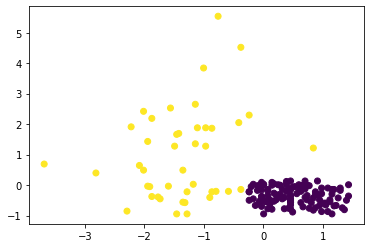

In [7]:
plt.scatter(ckd_df['Hemoglobin_n'], ckd_df['Blood_glucose_n'], c=y)

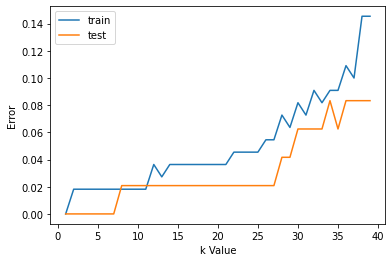

In [8]:
from sklearn.neighbors import KNeighborsClassifier
error1 = []
error2 = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train != y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))
plt.plot(range(1,40), error1, label="train")
plt.plot(range(1,40), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [9]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train.values, y_train)

KNeighborsClassifier(n_neighbors=9)

In [10]:
knn.score(X_test.values, y_test)

0.9791666666666666

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test.values)
cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  0],
       [ 1, 11]])

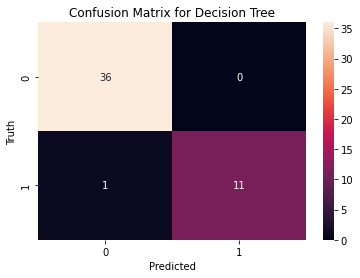

In [12]:
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.92      0.96        12

    accuracy                           0.98        48
   macro avg       0.99      0.96      0.97        48
weighted avg       0.98      0.98      0.98        48



In [14]:
knn.predict([[0, 1.1]])

array([0])

Alice is predicted to not have chronic kidney disease based on her hemoglobin and blood glucose levels by the KNN Classifier.

Decision Tree

In [15]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")

In [16]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
model.score(X_train, y_train)

1.0

In [18]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

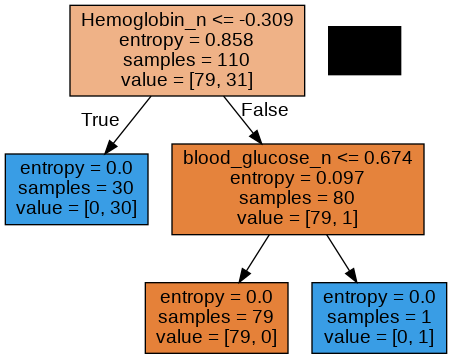

In [19]:
dot_data = StringIO()
export_graphviz(model, feature_names=["Hemoglobin_n", "blood_glucose_n"], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
y_predict = model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_predict)
cm_dt

array([[36,  0],
       [ 0, 12]])

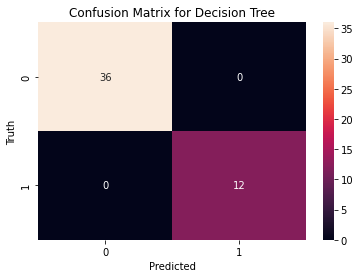

In [21]:
sns.heatmap(cm_dt, annot=True)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        12

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [23]:
model.predict([[0, 1.1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

The decision tree predicts alice to have Chronic Kidney Disease(CKD) based on her Hemoglobin and Blood Glucose levels.

Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [25]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0])

In [27]:
model.score(X_test, y_test)

1.0

In [28]:
y_predict = model.predict(X_test)
cm_lr = confusion_matrix(y_test, y_predict)
cm_lr

array([[36,  0],
       [ 0, 12]])

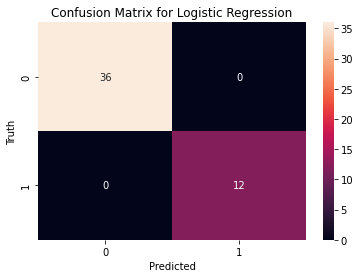

In [29]:
sns.heatmap(cm_lr, annot=True)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        12

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [31]:
model.predict([[0, 1.1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

The Logistic Regression model predicts Alice to have CKD.

Q5) Wine Dataset

In [32]:
wine_df = pd.read_csv('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/wine.csv')
wine_df.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
wine_df.columns[wine_df.isna().any()]

Index([], dtype='object')

In [34]:
target = wine_df['Class']
inputs = wine_df.drop('Class', axis=1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

KNN

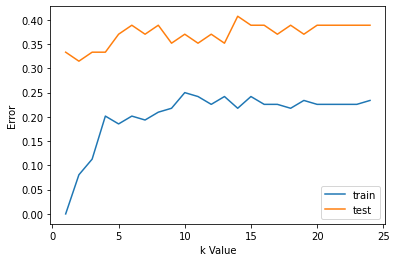

In [36]:
from sklearn.neighbors import KNeighborsClassifier
error1 = []
error2 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train != y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))
plt.plot(range(1,25), error1, label="train")
plt.plot(range(1,25), error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [38]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
knn_model.score(X_test, y_test)

0.6296296296296297

In [40]:
y_pred = knn_model.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
cm_knn

array([[11,  0,  2],
       [ 2, 16,  8],
       [ 2,  6,  7]])

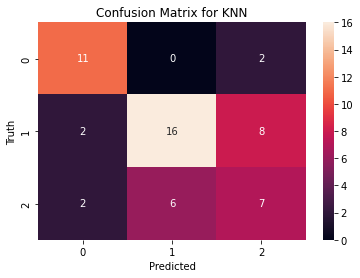

In [41]:
sns.heatmap(cm_knn, annot=True)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.85      0.79        13
           2       0.73      0.62      0.67        26
           3       0.41      0.47      0.44        15

    accuracy                           0.63        54
   macro avg       0.62      0.64      0.63        54
weighted avg       0.64      0.63      0.63        54



Decision Tree

In [43]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [44]:
model.score(X_train, y_train)

1.0

In [45]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

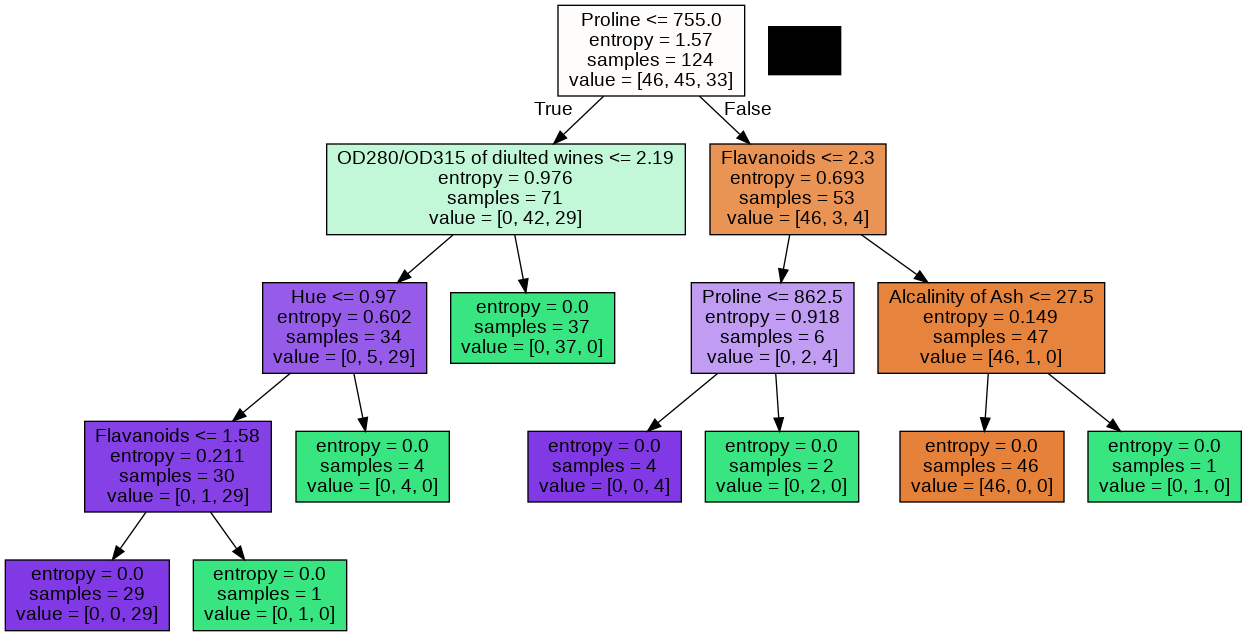

In [46]:
dot_data = StringIO()
export_graphviz(model, feature_names=X_train.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [47]:
y_predict = model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_predict)
cm_dt

array([[10,  3,  0],
       [ 0, 24,  2],
       [ 0,  2, 13]])

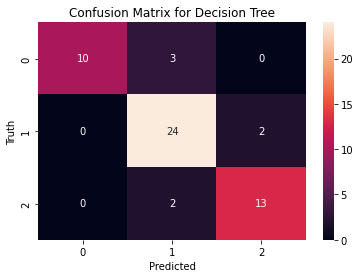

In [48]:
sns.heatmap(cm_dt, annot=True)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      0.77      0.87        13
           2       0.83      0.92      0.87        26
           3       0.87      0.87      0.87        15

    accuracy                           0.87        54
   macro avg       0.90      0.85      0.87        54
weighted avg       0.88      0.87      0.87        54



Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [51]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [52]:
classifier_rf.oob_score_

0.9838709677419355

In [53]:
classifier_rf.score(X_test, y_test)

1.0

In [54]:
y_predict = model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_predict)
cm_rf

array([[10,  3,  0],
       [ 0, 24,  2],
       [ 0,  2, 13]])

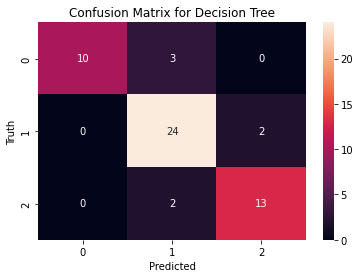

In [55]:
sns.heatmap(cm_rf, annot=True)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [56]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      0.77      0.87        13
           2       0.83      0.92      0.87        26
           3       0.87      0.87      0.87        15

    accuracy                           0.87        54
   macro avg       0.90      0.85      0.87        54
weighted avg       0.88      0.87      0.87        54



D. Regression

Q7) Predict Home prices employing multiple regression. Compare performance with a KNN  Regressor model used for prediction. Draw a residual plot for these predictions and offer your comments. 

In [57]:
house_df = pd.read_csv('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/house.csv')
house_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [58]:
house_df.columns[house_df.isna().any()]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

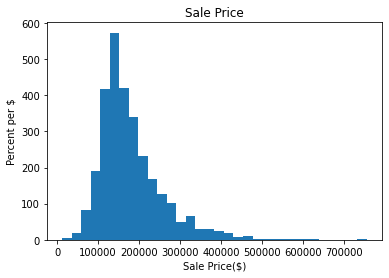

In [59]:
plt.hist(house_df['SalePrice'], bins=32)
plt.title('Sale Price')
plt.xlabel('Sale Price($)')
plt.ylabel('Percent per $')
plt.show()

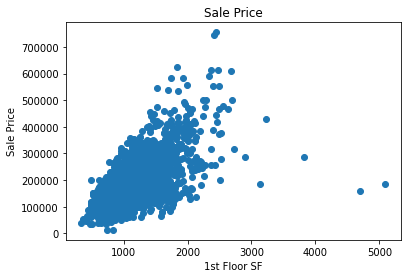

In [60]:
plt.scatter(house_df['1st Flr SF'], house_df['SalePrice'])
plt.title('Sale Price')
plt.xlabel('1st Floor SF')
plt.ylabel('Sale Price')
plt.show()

In [61]:
house_df.corr().abs().unstack().drop_duplicates().sort_values(ascending=False)

Order           Order             1.000000
                Yr Sold           0.975993
Garage Cars     Garage Area       0.889676
Year Built      Garage Yr Blt     0.834849
Gr Liv Area     TotRms AbvGrd     0.807772
                                    ...   
Enclosed Porch  Yr Sold           0.000505
Order           2nd Flr SF        0.000417
MS SubClass     Mo Sold           0.000350
Mas Vnr Area    Mo Sold           0.000276
Fireplaces      Enclosed Porch    0.000250
Length: 742, dtype: float64

In [62]:
house_df['Garage Area'].fillna(house_df['Garage Area'].mean(), inplace=True)

In [63]:
house_df['Total Bsmt SF'].fillna(house_df['Total Bsmt SF'].mean(), inplace=True)

In [64]:
house_df['Garage Area'].isna().any(), house_df['Total Bsmt SF'].isna().any()

(False, False)

In [65]:
inputs = house_df.loc[:, ['1st Flr SF', '2nd Flr SF', 'Garage Area', 'Total Bsmt SF', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Year Built', 'Yr Sold']]
inputs.head()

,1st Flr SF,2nd Flr SF,Garage Area,Total Bsmt SF,Wood Deck SF,Open Porch SF,Lot Area,Year Built,Yr Sold
0,1656,0,528.0,1080.0,210,62,31770,1960,2010
1,896,0,730.0,882.0,140,0,11622,1961,2010
2,1329,0,312.0,1329.0,393,36,14267,1958,2010
3,2110,0,522.0,2110.0,0,0,11160,1968,2010
4,928,701,482.0,928.0,212,34,13830,1997,2010


In [66]:
target = house_df['SalePrice']
target.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

In [68]:
lm = LinearRegression(fit_intercept=True)

In [69]:
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
print(lm.intercept_) 

-235693.25455964502


In [71]:
coeff_df = pd.DataFrame(lm.coef_, inputs.columns, columns=['Coefficient'])
coeff_df

,Coefficient
1st Flr SF,65.550192
2nd Flr SF,63.869519
Garage Area,62.484043
Total Bsmt SF,35.293051
Wood Deck SF,33.780173
Open Porch SF,13.582624
Lot Area,0.250741
Year Built,693.003207
Yr Sold,-558.152048


In [72]:
lm_pred = lm.predict(X_test)

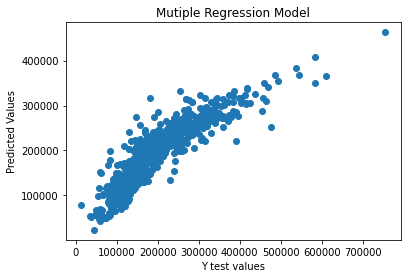

In [73]:
plt.scatter(y_test, lm_pred)
plt.title('Mutiple Regression Model')
plt.xlabel('Y test values')
plt.ylabel('Predicted Values')
plt.show()

In [74]:
from statsmodels.formula.api import ols
reg = ols("SalePrice ~ Q('1st Flr SF') + Q('2nd Flr SF') + Q('Garage Area') + Q('Total Bsmt SF') + Q('Wood Deck SF') + Q('Open Porch SF') + Q('Lot Area') + Q('Year Built') + Q('Yr Sold')", data=house_df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     908.7
Date:                Wed, 04 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:31:31   Log-Likelihood:                -35276.
No. Observations:                2930   AIC:                         7.057e+04
Df Residuals:                    2920   BIC:                         7.063e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.227e+05   1.16

Text(0.5, 1.0, 'Homoscedasticity')

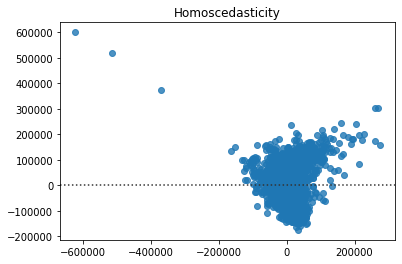

In [75]:
pred_val = reg.fittedvalues.copy()
true_val = house_df['SalePrice'].values.copy()
residuals = true_val - pred_val
sns.residplot(x=residuals, y=pred_val)
plt.title('Homoscedasticity')

In [76]:
from sklearn import metrics
print(f'MAE: {metrics.mean_absolute_error(y_test, lm_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, lm_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lm_pred))}')

MAE: 26541.430560306802
MSE: 1658747687.288792
RMSE: 40727.726272022504


In [77]:
knn_model = KNeighborsClassifier(n_neighbors=15)

In [78]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [79]:
knn_model.score(X_test, y_test)

0.009101251422070534

In [80]:
knn_pred = knn_model.predict(X_test)

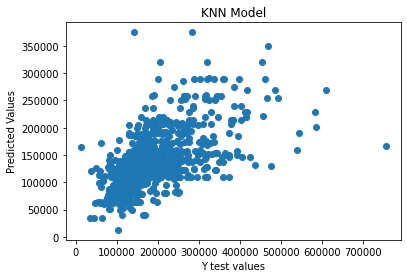

In [81]:
plt.scatter(y_test, knn_pred)
plt.title('KNN Model')
plt.xlabel('Y test values')
plt.ylabel('Predicted Values')
plt.show()

In [82]:
print(f'MAE: {metrics.mean_absolute_error(y_test, lm_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, lm_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lm_pred))}')

MAE: 26541.430560306802
MSE: 1658747687.288792
RMSE: 40727.726272022504


Multiple Regression model performed better in comparison to KNN for the given regression task.

Q8) Implement a logistic regression model – employ scikit-learn library functions. 

In [83]:
train = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/titanic/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/titanic/test.csv")

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
train.shape, test.shape

((891, 12), (418, 11))

In [87]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


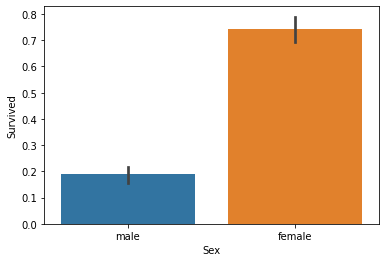

In [88]:
sns.barplot(x="Sex", y="Survived", data=train)

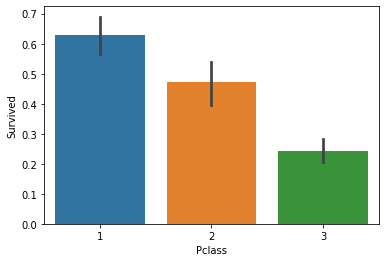

In [89]:
sns.barplot(x="Pclass", y="Survived", data=train)

In [90]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())
train["Pclass"] = train["Pclass"].fillna(train["Pclass"].mode())
train = train.fillna({"Embarked": "S"})

In [91]:
train = train.drop(['Name', 'Cabin', 'Ticket'], axis = 1)
test = test.drop(['Name', 'Cabin', 'Ticket'], axis = 1)

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex_n'] = le.fit_transform(train['Sex'])
test['Sex_n'] = le.fit_transform(test['Sex'])

In [93]:
train['Embarked_n'] = le.fit_transform(train['Embarked'])
test['Embarked_n'] = le.fit_transform(test['Embarked'])

In [94]:
train = train.drop(['Fare', 'Sex', 'Embarked', 'PassengerId'], axis = 1)
test = test.drop(['Fare', 'Sex', 'Embarked'], axis = 1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_n,Embarked_n
0,0,3,22.0,1,0,1,2
1,1,1,38.0,1,0,0,0
2,1,3,26.0,0,0,0,2
3,1,1,35.0,1,0,0,2
4,0,3,35.0,0,0,1,2


In [95]:
inputs = train.drop(['Survived'], axis=1)
inputs.head()

,Pclass,Age,SibSp,Parch,Sex_n,Embarked_n
0,3,22.0,1,0,1,2
1,1,38.0,1,0,0,0
2,3,26.0,0,0,0,2
3,1,35.0,1,0,0,2
4,3,35.0,0,0,1,2


In [96]:
target = train["Survived"]
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.25)

In [98]:
model = LogisticRegression(fit_intercept=True)

In [99]:
model.fit(X_train, y_train)

LogisticRegression()

In [100]:
model.score(X_test, y_test)

0.7892376681614349

In [101]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       142
           1       0.71      0.70      0.71        81

    accuracy                           0.79       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



In [102]:
cm_titanic = confusion_matrix(y_test, y_pred)
cm_titanic

array([[119,  23],
       [ 24,  57]])

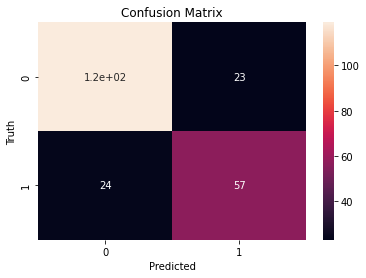

In [103]:
sns.heatmap(cm_titanic, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()